<a href="https://colab.research.google.com/github/1kr1st1na1/SWOT01032021/blob/main/connection1504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT1'))
from google.auth import default
creds, _ = default()
gs = gspread.authorize(creds)
import os
import time
print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT1/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT1/TABLE.gsheet')
table = gs.open_by_key('1LSWFOVthquRnsqGwxX7eNQCzqY_j1fKd7fq8KUlQczo')
print(dir(table))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'sample_data']
['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']
['swot_dictionary11.json', 'mathplot_bar_swot.png', 'TABLE.gsheet', 'connection.ipynb']

Работаем с таблицей
total 86
-rw------- 1 root 72380 Apr 15 16:58 connection.ipynb
-rw------- 1 root 11907 Apr 15 16:58 mathplot_bar_swot.png
-rw------- 1 root  2188 Apr 15 16:58 swot_dictionary11.json
-rw------- 1 root   143 Apr 15 16:58 TABLE.gsheet
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_properties', '_spreadsheets_get', '_spreadsheets_s


Работаем с листом strengths
total 86
-rw------- 1 root 72380 Apr 15 16:58 connection.ipynb
-rw------- 1 root 11907 Apr 15 16:58 mathplot_bar_swot.png
-rw------- 1 root  2188 Apr 15 16:58 swot_dictionary11.json
-rw------- 1 root   143 Apr 15 16:58 TABLE.gsheet
1 ['Небольшие затраты на производство', 'В начале необходимо около 40 тыс.руб., вода, свет, тепло, субстрат', '8', '0.9', '7.2', '', '', '']
2 ['Удобное местоположение', 'Нет необходимости возводить масштабную и дорогую теплицу, может находиться прямо в городе', '9', '1', '9', '', 'Суммарная power:', '30.85']
3 ['Круглогодичность производства', 'Обусловлено вырщиванием в теплицах', '9', '0.85', '7.65', '', '', '']
4 ['Большой объём производимого товара на небольшой площади', 'Обусловлено тем, что это микрозелень', '7', '1', '7', '', '', '']
[[7.2], [9.0], [7.6499999999999995], [7.0]]
Суммарная Power strengths составляет: 30.849999999999998


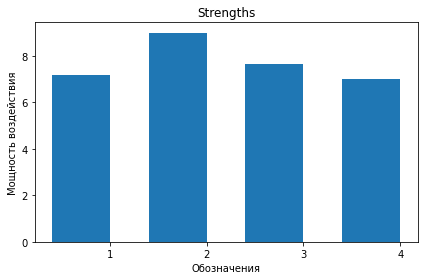

1 -  Небольшие затраты на производство
2 -  Удобное местоположение
3 -  Круглогодичность производства
4 -  Большой объём производимого товара на небольшой площади
Fri Apr 15 16:58:33 MSK 2022


In [ ]:
#работаем с листом strengths
print('\nРаботаем с листом strengths')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT1/
os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT1/')
#подсчёт суммарной power в strengths
worksheet = table.worksheet("strengths")
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
print(power_sh)
worksheet.update('E2:E10', power_sh)
result = sum(power)
worksheet.update('G3','Суммарная power:')
worksheet.update('H3',result)
print('Суммарная Power strengths составляет:', result)
#Диаграмма strengths
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#лист line через цикл/для подсчёта кол-ва пуктов=>cтолбцов диаграммы
i=0
line= list()
cols=worksheet.col_values(1)
for col in cols:
  if (i>0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a=worksheet.col_values(1)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Strengths')
ax.set_xlabel('Обозначения')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()
k=0
#вывод пунктов из name в цикле(подпись диаграммы)
for col in cols:
  if(k>0):
    print (k,'- ', col)
  k+=1
!date


Работаем с листом weaknesses
total 86
-rw------- 1 root 72380 Apr 15 16:58 connection.ipynb
-rw------- 1 root 11907 Apr 15 16:58 mathplot_bar_swot.png
-rw------- 1 root  2188 Apr 15 16:58 swot_dictionary11.json
-rw------- 1 root   143 Apr 15 16:58 TABLE.gsheet
1 ['Болезнь растений, почвы', 'Тщательный уход, проверки. Удобрения.', '9', '0.4', '3.6', '', '', '']
2 ['Малые сроки хранения (в среднем 10 дней)', 'Акции. Сотрудничество с ресторанами, кафе, иными предприятиями', '7', '0.5', '3.5', '', 'Суммарная power:', '9.9']
3 ['Потеря энерго- и водо- снабжения', 'Маловероятно', '8', '0.1', '0.8', '', '', '']
4 ['Недобросовестность персонала', 'Выплата премий(надбавок). Назначение штрафов.', '8', '0.25', '2', '', '', '']
[[3.6], [3.5], [0.8], [2.0]]
Суммарная Power weaknesses составляет: 9.899999999999999


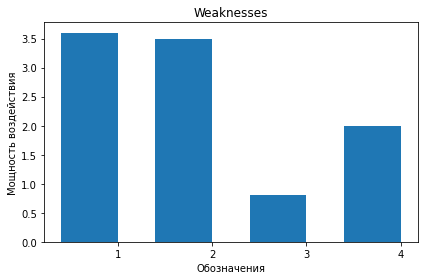

1 -  Болезнь растений, почвы
2 -  Малые сроки хранения (в среднем 10 дней)
3 -  Потеря энерго- и водо- снабжения
4 -  Недобросовестность персонала
Fri Apr 15 16:58:36 MSK 2022


In [ ]:
#работаем с листом weaknesses
print('\nРаботаем с листом weaknesses')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT1/
os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT1/')
#Подсчёт суммарной power в weaknesses
worksheet = table.worksheet("weaknesses")
rows = worksheet.get_all_values()
name = list()
actions = list()
importanceW = list()
probabilityW = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
print(power_sh)
worksheet.update('E2:E10', power_sh)
result= sum(power)
worksheet.update('G3','Суммарная power:')
worksheet.update('H3',result)
print('Суммарная Power weaknesses составляет:', result)
#Диаграмма weaknesses
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#лист line через цикл/для подсчёта кол-ва пуктов=>cтолбцов
i=0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    line.append(i)
  i+=1

powers = power
x = np.arange(len(line))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a=worksheet.col_values(1)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Weaknesses')
ax.set_xlabel('Обозначения')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()
k=0
#вывод пунктов из name в цикле(подпись диаграммы)
for col in cols:
  if(k>0):
    print (k,'- ', col)
  k+=1
!date


Работаем с листом opportunities
total 86
-rw------- 1 root 72380 Apr 15 16:58 connection.ipynb
-rw------- 1 root 11907 Apr 15 16:58 mathplot_bar_swot.png
-rw------- 1 root  2188 Apr 15 16:58 swot_dictionary11.json
-rw------- 1 root   143 Apr 15 16:58 TABLE.gsheet
1 ['Выход на российский рынок', 'Достигается увеличением объёма производства и изучением спроса', '7', '0.5', '3.5', '', '', '']
2 ['Расширение ассортимента', 'Обуслевлено спросом, достигается с помощью прибыли', '6', '0.5', '3', '', 'Суммарная power:', '17.9']
3 ['Спрос на продукцию', 'Обуслевлено желанием покупателей правильно и здорово питаться', '6', '0.7', '4.2', '', '', '']
4 ['Наличие необходимых ресурсов и умений', 'Достигается привлечением специалистами и инфраструктурой', '8', '0.9', '7.2', '', '', '']
[[3.5], [3.0], [4.199999999999999], [7.2]]
Суммарная Power opportunities составляет: 17.9


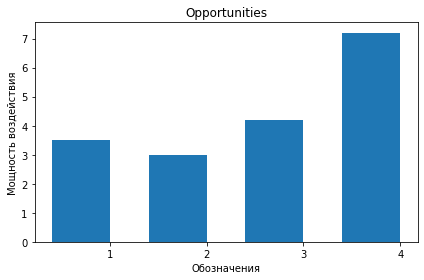

1 -  Выход на российский рынок
2 -  Расширение ассортимента
3 -  Спрос на продукцию
4 -  Наличие необходимых ресурсов и умений
Fri Apr 15 16:58:37 MSK 2022


In [ ]:
#работаем с листом opportunities
print('\nРаботаем с листом opportunities')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT1/
os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT1/')
#Подсчёт суммарной power в opportunities
worksheet = table.worksheet("opportunities")
rows = worksheet.get_all_values()
name = list()
actions = list()
importanceW = list()
probabilityW = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
print(power_sh)
worksheet.update('E2:E10', power_sh)
result= sum(power)
worksheet.update('G3','Суммарная power:')
worksheet.update('H3',result)
print('Суммарная Power opportunities составляет:', result)
#Диаграмма opportunities
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#лист line через цикл/для подсчёта кол-ва пуктов=>cтолбцов
i=0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    line.append(i)
  i+=1

powers = power
x = np.arange(len(line))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a=worksheet.col_values(1)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Opportunities')
ax.set_xlabel('Обозначения')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()
k=0
#вывод пунктов из name в цикле(подпись диаграммы)
for col in cols:
  if(k>0):
    print (k,'- ', col)
  k+=1
!date


Работаем с листом threats
total 86
-rw------- 1 root 72380 Apr 15 16:58 connection.ipynb
-rw------- 1 root 11907 Apr 15 16:58 mathplot_bar_swot.png
-rw------- 1 root  2188 Apr 15 16:58 swot_dictionary11.json
-rw------- 1 root   143 Apr 15 16:58 TABLE.gsheet
1 ['Увеличение рыночной власти покупателей', 'Привлечение покупателей специальными предложениями(акциями), рекламой', '9', '0.60', '5.4', '', '', '']
2 ['Увеличение рыночной власти поставщиков', 'Взаимовыгодный договор,поиск новых источников поставки', '9', '0.15', '1.35', '', 'Суммарная power:', '14.75']
3 ['Возможность появления новых конкурентов', 'Обусловлено небольшой суммой для первоначального входа на рынок', '8', '0.5', '4', '', '', '']
4 ['Конкуренция с действующими компаниями-участниками рынка', 'Можно ослабить рекламой, качеством и доступностью товара', '8', '0.5', '4', '', '', '']
[[5.3999999999999995], [1.3499999999999999], [4.0], [4.0]]
Суммарная Power threats составляет: 14.75


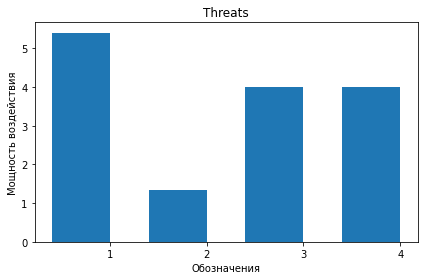

1 -  Увеличение рыночной власти покупателей
2 -  Увеличение рыночной власти поставщиков
3 -  Возможность появления новых конкурентов
4 -  Конкуренция с действующими компаниями-участниками рынка
Fri Apr 15 16:58:40 MSK 2022


In [ ]:
#работаем с листом threats
print('\nРаботаем с листом threats')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/SWOT1/
os.listdir('/content/drive/MyDrive/Colab Notebooks/SWOT1/')
#Подсчёт суммарной power в threats
worksheet = table.worksheet("threats")
rows = worksheet.get_all_values()
name = list()
actions = list()
importanceW = list()
probabilityW = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
print(power_sh)
worksheet.update('E2:E10', power_sh)
result= sum(power)
worksheet.update('G3','Суммарная power:')
worksheet.update('H3',result)
print('Суммарная Power threats составляет:', result)
#Диаграмма Threats
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#лист line через цикл/для подсчёта кол-ва пуктов=>cтолбцов
i=0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    line.append(i)
  i+=1

powers =power
x = np.arange(len(line))  # the label locations
width = 0.6  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a=worksheet.col_values(1)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Threats')
ax.set_xlabel('Обозначения')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()
k=0
#вывод пунктов из name в цикле(подпись диаграммы)
for col in cols:
  if(k>0):
    print (k,'- ', col)
  k+=1
!date

[1, 2, 3, 4, 5] ['strengths', 'weaknesses', 'opportunities', 'threats', 'result'] [30.85, -9.9, 17.9, -14.75, 24.1]


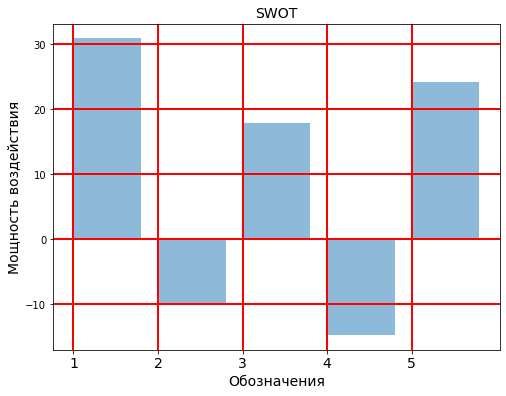

1  -  strengths ; 
2  -  weaknesses ; 
3  -  opportunities ; 
4  -  threats ; 
5  -  result ; 


In [ ]:
#Итоговые подсчёты и диаграмма
import os
import json

def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()

    #Перенос значений power из листов 4-х элементов SWOT-анализа в лист 'result'
    worksheet = table.worksheet("strengths")
    stren=worksheet.acell('H3').value
    worksheet = table.worksheet("weaknesses")
    weak=worksheet.acell('H3').value
    worksheet = table.worksheet("opportunities")
    opp=worksheet.acell('H3').value
    worksheet = table.worksheet("threats")
    thr=worksheet.acell('H3').value
    worksheet = table.worksheet("result")
    worksheet.update('B2',stren)
    stren=worksheet.acell('B2').value
    worksheet.update('B3',weak)
    weak=worksheet.acell('B3').value
    worksheet.update('B4',opp)
    opp=worksheet.acell('B4').value
    worksheet.update('B5',thr)
    thr=worksheet.acell('B5').value

    #.json для постороения диаграммы. Записываю в него значения power 4-х элементов SWOT-анализа
    read_file = open("/content/drive/MyDrive/Colab Notebooks/SWOT1/swot_dictionary11.json", 'r+')
    read_file.write('{"weaknesses": ')
    read_file.write(weak)
    read_file.write(', "opportunities": ')
    read_file.write(opp)
    read_file.write(', "strengths": ')
    read_file.write(stren)
    read_file.write(', "threats": ')
    read_file.write(thr)
    read_file.write('}')
    read_file.write('\n')

    i=0
    for line in read_file.readlines():
        i+=1
        data = json.loads(line)
        title = [ "strengths", "weaknesses", "opportunities", "threats", "result"]
        x=title
        x_float = [1, 2, 3, 4, 5]
        result = float(data['strengths']) - 1*float(data['weaknesses']) + float(data['opportunities']) - 1*float(data['threats'])
        y = [float(data['strengths']), float(data['weaknesses']), float(data['opportunities']), float(data['threats'])]
        y_float = [float(data['strengths']), -1*float(data['weaknesses']), float(data['opportunities']), -1*float(data['threats']),  result]
    print(x_float,title,y_float)
    #запись итоговой result в таблицу на лист 'result'
    worksheet=table.worksheet('result')
    worksheet.update('C2',result)
    read_file.close()
    x_pos=list()
    for i in range(x_float.__len__()):
        x_pos.append(i)
    fig=plt.figure(figsize=(8,6), dpi=72)
    plt.bar(x_pos, y_float, width=0.8, align='edge', alpha=0.5)
    plt.xticks(x_pos,  x_float, fontsize=14)
    plt.xlabel('Обозначения', fontsize=14)
    plt.ylabel('Мощность воздействия', fontsize=14)
    plt.title('SWOT', fontsize=14)
    plt.grid(True, color='r', linestyle='-', linewidth=2)
    plt.show()
    fig.savefig("/content/drive/MyDrive/Colab Notebooks/SWOT1/mathplot_bar_swot.png")
  
    for i in range(title.__len__()):
        print(i+1, " - ", title[i], "; ")
        i += 1
    
if __name__ == "__main__":
    element = 'swot_dictionary'
    matplot(element)
    #!date